In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('results-testbed.csv')

In [8]:
df = df.drop(columns=['Unnamed: 0'])
print(df.shape)
df.head()

(6000000, 4)


,step,reward,is_optimal,epsilon
0,0,-2.427660,False,0.0
1,1,-1.253998,False,0.0
2,2,1.000128,False,0.0
3,3,0.256448,False,0.0
4,4,0.319289,False,0.0


In [9]:
agg = df.groupby(["epsilon", "step"]).agg({"reward": np.mean, "is_optimal": [np.sum, len]})
agg.head()
agg['optimal %'] = agg['is_optimal']['sum'] / agg['is_optimal']['len']
agg['avg_reward'] = agg['reward']['mean']
agg = agg[['avg_reward', 'optimal %']]
agg = agg.reset_index()
agg.head()

,epsilon,step,avg_reward,optimal %
,,,,
0,0.0,0,0.005210,0.0985
1,0.0,1,0.315473,0.1460
2,0.0,2,0.459594,0.1705
3,0.0,3,0.532411,0.1930
4,0.0,4,0.577387,0.2120


epsilon
0.00    AxesSubplot(0.125,0.125;0.775x0.755)
0.01    AxesSubplot(0.125,0.125;0.775x0.755)
0.10    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_reward, dtype: object

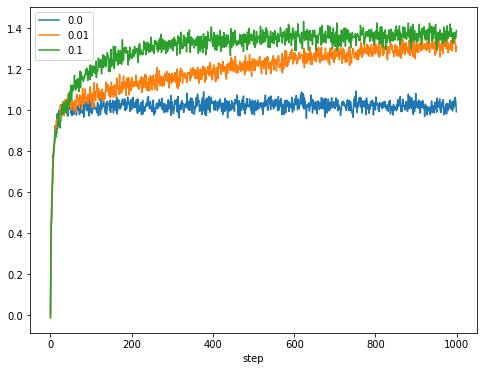

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
agg.set_index('step').groupby('epsilon')['avg_reward'].plot(legend=True, ax=ax)

epsilon
0.00    AxesSubplot(0.125,0.125;0.775x0.755)
0.01    AxesSubplot(0.125,0.125;0.775x0.755)
0.10    AxesSubplot(0.125,0.125;0.775x0.755)
Name: optimal %, dtype: object

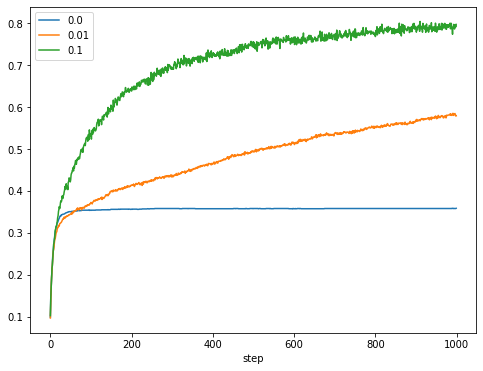

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
agg.set_index('step').groupby('epsilon')['optimal %'].plot(legend=True, ax=ax)